In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
#Import the csv file
data= pd.read_csv('/content/drive/My Drive/heart.csv', header = 'infer')

In [183]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [184]:
#show general info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [185]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [186]:
#check the columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [187]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [188]:
#check the nan values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

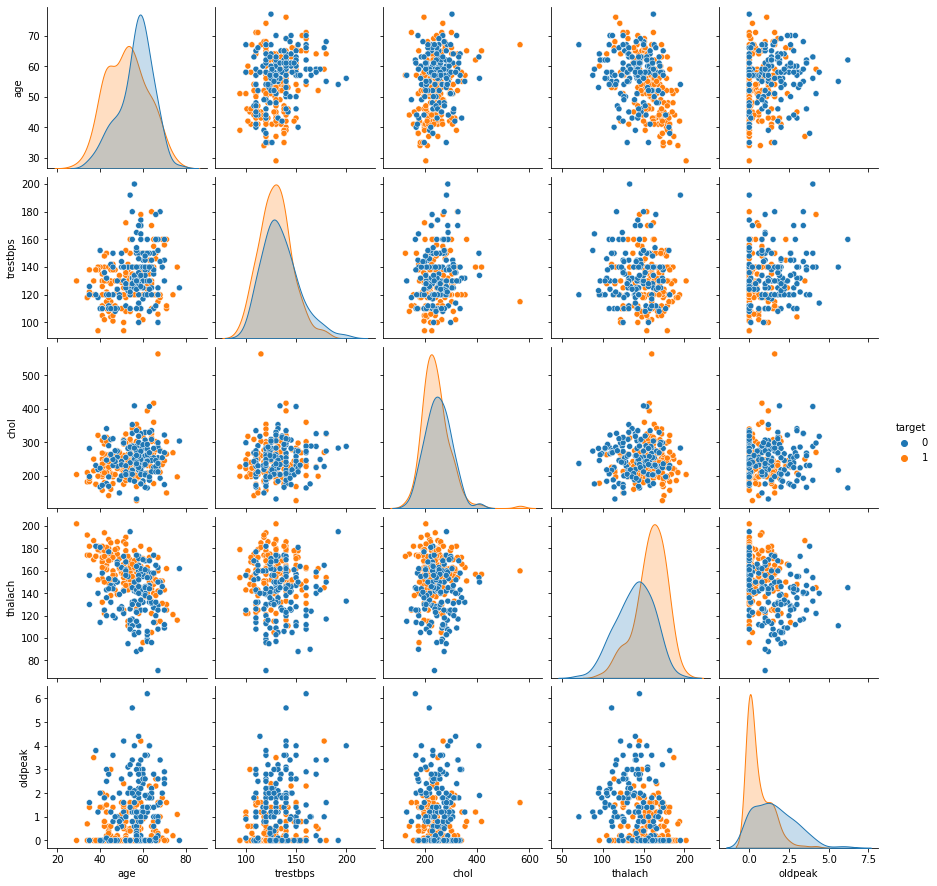

In [189]:
sns.pairplot(data[['age','trestbps','chol','thalach','oldpeak','target']],hue='target')#we plot the dependencies between each two of the listed features with the target calss color

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


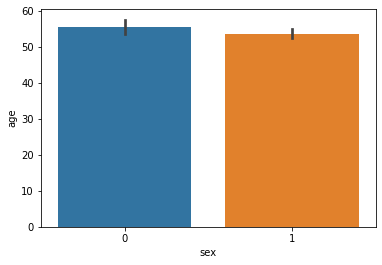

In [190]:
sns.barplot(data.sex, data.age)

In [191]:
#let's drop the outliers
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

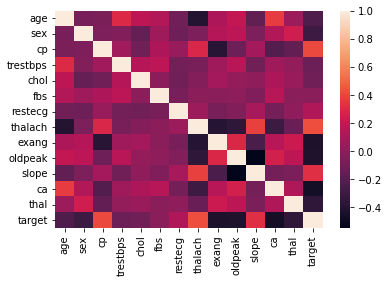

In [192]:
sns.heatmap(data.corr())

In [193]:
data.corr()# so as to visualize which features are the best for our pb we see the correlation with the target and pîck those with the highest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.072391,-0.060168,0.304702,0.177192,0.133044,-0.103736,-0.400067,0.112509,0.193431,-0.155421,0.368764,0.055830,-0.226750
sex,-0.072391,1.000000,-0.054418,-0.039006,-0.141218,0.058432,-0.108164,-0.053999,0.146867,0.166430,-0.054768,0.135552,0.244047,-0.302926
cp,-0.060168,-0.054418,1.000000,0.071251,-0.098794,0.116757,0.040067,0.288385,-0.382699,-0.109039,0.079304,-0.214083,-0.152710,0.408570
trestbps,0.304702,-0.039006,0.071251,1.000000,0.143586,0.167890,-0.090480,-0.075059,0.065089,0.156988,-0.103302,0.057947,0.027382,-0.119281
chol,0.177192,-0.141218,-0.098794,0.143586,1.000000,-0.005337,-0.101245,-0.030874,0.085002,0.032452,0.011007,0.113238,0.049204,-0.099821
fbs,0.133044,0.058432,0.116757,0.167890,-0.005337,1.000000,-0.073003,-0.007962,-0.009093,0.003692,-0.046927,0.151021,-0.014622,-0.011438
restecg,-0.103736,-0.108164,0.040067,-0.090480,-0.101245,-0.073003,1.000000,0.054974,-0.072134,-0.038347,0.088423,-0.084350,0.011584,0.130079
thalach,-0.400067,-0.053999,0.288385,-0.075059,-0.030874,-0.007962,0.054974,1.000000,-0.392686,-0.353441,0.379395,-0.297154,-0.123956,0.431519
exang,0.112509,0.146867,-0.382699,0.065089,0.085002,-0.009093,-0.072134,-0.392686,1.000000,0.298277,-0.240616,0.153605,0.222884,-0.429082
oldpeak,0.193431,0.166430,-0.109039,0.156988,0.032452,0.003692,-0.038347,-0.353441,0.298277,1.000000,-0.546473,0.260600,0.175196,-0.424443


we see that cp,thalach,exang, oldpeak,ca, slope are the best ones for our problem

### Machine learning model

In [194]:
# the most promising features are the one listed above
X = data[["cp", "thalach", "exang", "oldpeak", "ca", "slope"]]
# separating the target label
Y = data["target"]
(X.shape, Y.shape)

((287, 6), (287,))

### We will use knn

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)


Minimum error:- 0.25287356321839083 at K = 6


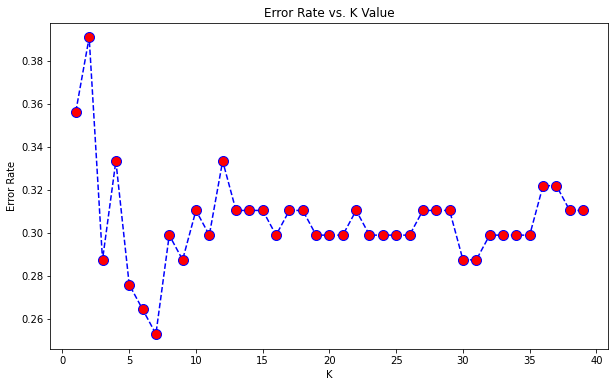

In [196]:
# now we will try to find the optimal k value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


we can see that the minimal error rate is when k=4

Maximum accuracy: 0.7471264367816092 at K = 6


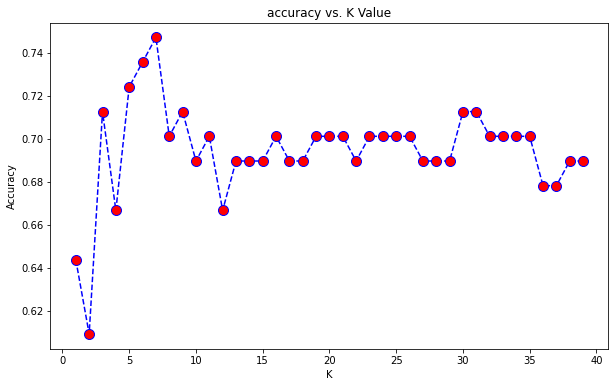

In [197]:
acc = []

from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))

In [198]:
#NOW THAT WE KNOW THE BEST VALUE OF K, Let's train it again
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

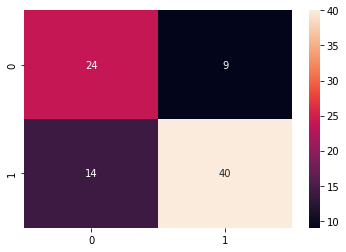

In [199]:
#Confusion matrix
Y_predict = knn.predict(X_test)
conf_mat = metrics.confusion_matrix(y_test,Y_predict)
sns.heatmap(conf_mat, annot=True)

In [200]:
#metrics
print(f'Accuracy = {metrics.accuracy_score(y_test, Y_predict)}')
print(f'Precision = {metrics.precision_score(y_test, Y_predict)}')
print(f'Recall = {metrics.recall_score(y_test, Y_predict)}')
print(f'R² = {metrics.r2_score(y_test, Y_predict)}')

Accuracy = 0.735632183908046
Precision = 0.8163265306122449
Recall = 0.7407407407407407
R² = -0.12289562289562306


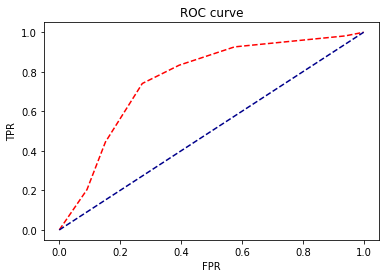

In [212]:
#roc curve
fpr, tpr, threshold = metrics.roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.plot(fpr, tpr, linestyle= '--', color = "red")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

### Logistic regression model

In [201]:
#get the model
model = LogisticRegression().fit(X_train, y_train)
model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8045977011494253

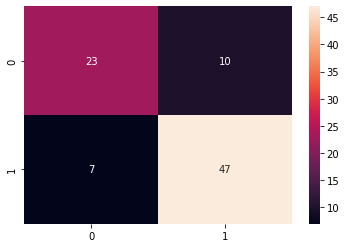

In [202]:
#Confusion matrix
Y_predict = model.predict(X_test)
conf_mat = metrics.confusion_matrix(y_test,Y_predict)
sns.heatmap(conf_mat, annot=True)

In [203]:
#metrics
print(f'Accuracy = {metrics.accuracy_score(y_test, Y_predict)}')
print(f'Precision = {metrics.precision_score(y_test, Y_predict)}')
print(f'Recall = {metrics.recall_score(y_test, Y_predict)}')
print(f'R² = {metrics.r2_score(y_test, Y_predict)}')

Accuracy = 0.8045977011494253
Precision = 0.8245614035087719
Recall = 0.8703703703703703
R² = 0.17003367003366987


In [209]:
model.predict_proba(X_test)

array([[0.87315922, 0.12684078],
       [0.11528173, 0.88471827],
       [0.92857135, 0.07142865],
       [0.10476034, 0.89523966],
       [0.38118317, 0.61881683],
       [0.16724872, 0.83275128],
       [0.05016469, 0.94983531],
       [0.03669898, 0.96330102],
       [0.80919409, 0.19080591],
       [0.76375694, 0.23624306],
       [0.31253845, 0.68746155],
       [0.57252142, 0.42747858],
       [0.09926354, 0.90073646],
       [0.32674502, 0.67325498],
       [0.8773836 , 0.1226164 ],
       [0.2094432 , 0.7905568 ],
       [0.22273045, 0.77726955],
       [0.45424699, 0.54575301],
       [0.99840044, 0.00159956],
       [0.27671779, 0.72328221],
       [0.76589996, 0.23410004],
       [0.90437785, 0.09562215],
       [0.73674674, 0.26325326],
       [0.91566292, 0.08433708],
       [0.2351753 , 0.7648247 ],
       [0.54569599, 0.45430401],
       [0.05947273, 0.94052727],
       [0.65995974, 0.34004026],
       [0.10186737, 0.89813263],
       [0.89902602, 0.10097398],
       [0.

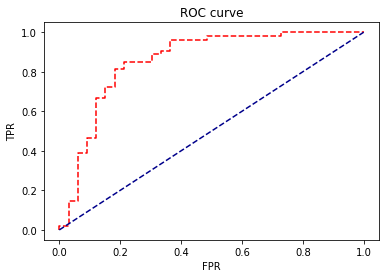

In [210]:
#roc curve
fpr, tpr, threshold = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.plot(fpr, tpr, linestyle= '--', color = "red")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')